In [26]:
import pandas as pd
import numpy as np
import datetime as dt

data=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\major project part 2\final_data1.csv")
data["date"]=pd.to_datetime(data["date"],yearfirst=True)
data.set_index("date",inplace=True,drop=True)
data


,kahu,kandaghat,kasauli,solan,arki,discharge
date,,,,,,
2010-01-01,0.0,0.0,0.0,0.0,0.0,NaN
2010-01-02,0.0,0.0,0.0,0.0,0.0,NaN
2010-01-03,0.0,0.0,0.0,0.0,0.0,NaN
2010-01-04,5.0,9.2,2.8,6.8,5.0,NaN
2010-01-05,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...
2018-12-27,0.0,0.0,0.0,0.0,0.0,NaN
2018-12-28,0.0,0.0,0.0,0.0,0.0,NaN
2018-12-29,0.0,0.0,0.0,0.0,0.0,NaN


<Axes: >

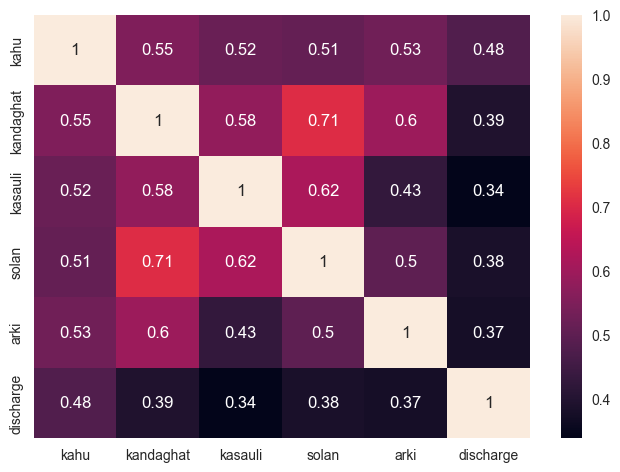

In [27]:
corr=data.dropna().corr()
import seaborn as sns
sns.heatmap(corr,annot=True)

<Axes: xlabel='date'>

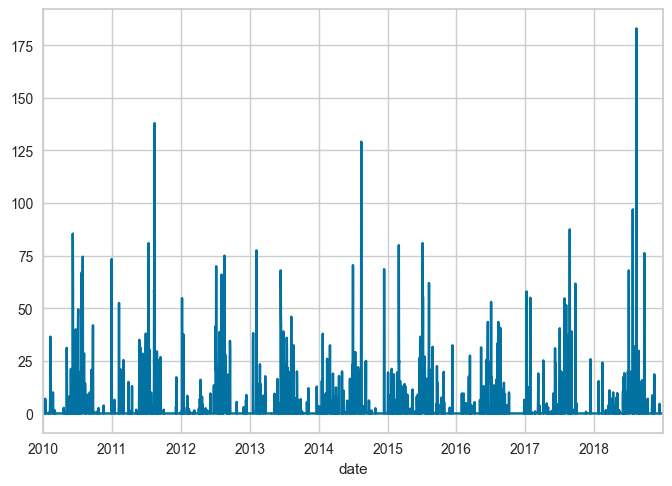

In [28]:
#data=data.loc[data["rainfall"]>0]
data["kahu"].plot()

In [29]:
data.columns

Index(['kahu', 'kandaghat', 'kasauli', 'solan', 'arki', 'discharge'], dtype='object')

In [30]:
for col in data.columns.delete(-1):










    
    data["30day"+"_"+col]=data[col].rolling(30).mean()

    data["5day"+"_"+col]=data[col].rolling(5).sum()

    data["3day_max"+"_"+col]=data[col].rolling(3).max()

    data["5day_max"+"_"+col]=data[col].rolling(5).max()




    data["90day"+"_"+col]=data[col].rolling(90).mean()
    data["3day"+"_"+col]=data[col].rolling(3).mean()
    data["4day"+"_"+col]=data[col].rolling(4).mean()
    data["2day"+"_"+col]=data[col].rolling(2).sum()
    data["30day_max"+"_"+col]=data[col].rolling(30).max()
    data["2day_max"+"_"+col]=data[col].rolling(2).max()
    data["4day_max"+"_"+col]=data[col].rolling(4).max()
    data["shifted_2"+"_"+col]=data[col].shift(periods=2)

    data["shifted"+"_"+col]=data[col].shift(periods=1)



    data["shifted_2_day"+"_"+col]=data["shifted"+"_"+col].rolling(2).sum()

    data["shifted_3_day"+"_"+col]=data["shifted"+"_"+col].rolling(3).sum()




 


#data.fillna(0,inplace=True)
#data


In [31]:
#data.info()
data=data.dropna()

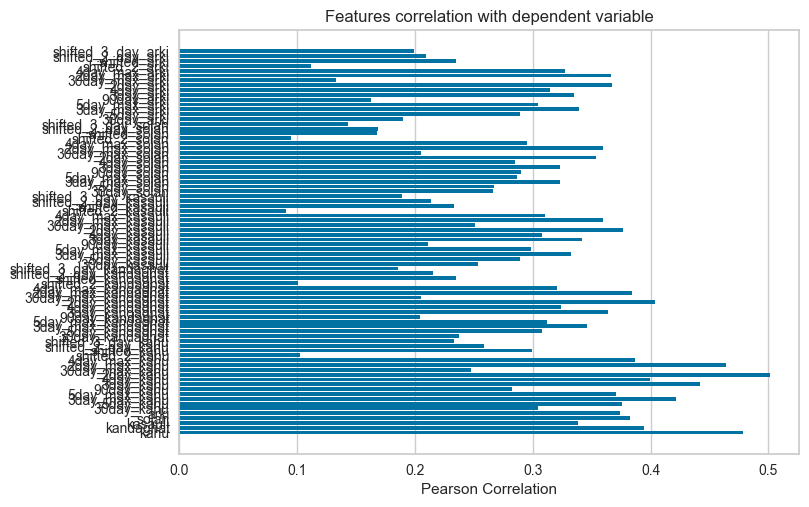

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [32]:
from yellowbrick.target import FeatureCorrelation
visualizer=FeatureCorrelation()
visualizer.fit(data.drop(["discharge"],axis=1),data["discharge"])
visualizer.poof()

In [33]:
data=data.loc[:,["2day_kahu","discharge","solan","kahu","arki","kasauli","kandaghat","90day_kahu","2day_max_kahu","4day_kahu","3day_kahu","3day_kasauli","3day_kandaghat","3day_arki","3day_solan"]]
# "shifted","3day","4day","3day_max","2day","2day_max","shifted_2_day","shifted_3_day","30day","90day","month","shifted_2_day","2day"

In [34]:
discharge=np.log(data["discharge"])

mean=discharge.mean()
std=discharge.std()

upper_limit_1=mean+2*std
print(upper_limit_1)

outliers=data.loc[(discharge>upper_limit_1),"discharge"]
print(data.loc[data.index.isin(outliers.index),:])

#data=data.loc[~data.index.isin(outliers.index),:]
data


5.179207786754633
            2day_kahu    discharge  solan   kahu     arki  kasauli  kandaghat  \
date                                                                            
2010-09-22       17.0   262.157370   39.0   17.0   42.000      4.5      40.30   
2012-08-19      108.0   653.043126    1.0   69.0   20.000      2.5       0.00   
2012-08-25       46.5   298.771053    0.0   18.5   56.000      0.5      18.75   
2015-07-17       41.0   178.856556  105.0   27.0  272.200     48.5     110.80   
2017-08-04       47.5   350.619200   55.0   29.0   58.400     16.0      62.50   
2017-08-05       80.5   194.961492   52.6   51.5   20.600    172.0       8.00   
2018-07-28       28.2   187.684062   76.4    5.2   43.775     55.5      38.00   
2018-08-12       67.6   334.421963    2.2   67.6   38.700     40.0      45.00   
2018-08-13      250.6  1307.643678  129.2  183.0  136.325    117.0     116.10   
2018-08-14      191.7   190.006043   34.4    8.7   22.150     45.5       0.00   
2018-09-22

,2day_kahu,discharge,solan,kahu,arki,kasauli,kandaghat,90day_kahu,2day_max_kahu,4day_kahu,3day_kahu,3day_kasauli,3day_kandaghat,3day_arki,3day_solan
date,,,,,,,,,,,,,,,
2010-05-31,0.0,0.368119,0.0,0.0,0.000,0.0,0.0,1.026667,0.0,5.300,7.066667,1.333333,4.333333,3.433333,0.000000
2010-06-01,0.0,0.283168,0.0,0.0,0.000,0.0,0.0,1.026667,0.0,5.300,0.000000,0.000000,0.000000,0.000000,0.000000
2010-06-02,0.0,0.254852,0.0,0.0,0.000,0.0,0.0,1.026667,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-06-03,0.0,0.254852,0.0,0.0,0.000,7.5,0.0,1.010000,0.0,0.000,0.000000,2.500000,0.000000,0.000000,0.000000
2010-06-04,2.4,0.254852,0.0,2.4,0.000,0.0,0.0,1.036667,2.4,0.600,0.800000,2.500000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-25,71.3,207.251003,39.6,59.3,68.725,127.5,48.5,10.892222,59.3,38.250,49.166667,84.166667,44.900000,53.975000,37.666667
2018-09-26,59.3,130.653932,0.0,0.0,0.000,0.0,0.0,10.670000,59.3,36.875,23.766667,49.166667,25.900000,30.008333,21.200000
2018-09-27,0.0,80.504796,0.0,0.0,0.000,0.0,0.0,10.664444,0.0,17.825,19.766667,42.500000,16.166667,22.908333,13.200000


In [35]:
data.to_csv("data2_new.csv")

In [36]:
dates_jun = (
    data['date'].dt.month.eq(6) &
    data['date'].dt.day.between(15, 30)
)


dates_jul = (
    data['date'].dt.month.eq(7) 

)

dates_aug = (
    data['date'].dt.month.eq(8) 
)

dates_sep = (
    data['date'].dt.month.eq(9) &
    data['date'].dt.day.between(0, 15)

)

#|dates_sep|dates_jun
dates=dates_jul|dates_aug|dates_sep|dates_jun

KeyError: 'date'